Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [ ]:
file_1 = unpickle('/content/drive/MyDrive/priject1/ml project/data_batch_1')
file_2 = unpickle('/content/drive/MyDrive/priject1/ml project/data_batch_2')
file_3 = unpickle('/content/drive/MyDrive/priject1/ml project/data_batch_3')
file_4 = unpickle('/content/drive/MyDrive/priject1/ml project/data_batch_4')
file_5 = unpickle('/content/drive/MyDrive/priject1/ml project/data_batch_5')
test_ar = unpickle('/content/drive/MyDrive/priject1/ml project/test_batch')

In [ ]:
meta_data = unpickle('/content/drive/MyDrive/priject1/ml project/batches.meta')
label_names = meta_data[b'label_names']
label_names = np.array(label_names)
label_names

array([b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog',
       b'frog', b'horse', b'ship', b'truck'], dtype='|S10')

In [ ]:
df1 = pd.DataFrame(file_1[b'data'])
df1['label'] = file_1[b'labels'] 

df2 = pd.DataFrame(file_2[b'data'])
df2['label'] = file_2[b'labels'] 

df3 = pd.DataFrame(file_3[b'data'])
df3['label'] = file_3[b'labels'] 

df4 = pd.DataFrame(file_4[b'data'])
df4['label'] = file_4[b'labels'] 

df5 = pd.DataFrame(file_5[b'data'])
df5['label'] = file_5[b'labels'] 

test = pd.DataFrame(test_ar[b'data'])
test['label'] = test_ar[b'labels'] 

In [ ]:
frames_concat = [df1, df2, df3, df4, df5]
train = pd.concat(frames_concat)

In [ ]:
X_train = train.drop(['label'], axis = 1)
y_train = train['label']
X_test = test.drop(['label'], axis = 1)
y_test = test['label']

In [ ]:
print('Shape of X_train is ',X_train.shape)
print('Shape of y_train is ',y_train.shape)
print('Shape of X_test is ',X_test.shape)
print('Shape of y_test is ',y_test.shape)

Shape of X_train is  (50000, 3072)
Shape of y_train is  (50000,)
Shape of X_test is  (10000, 3072)
Shape of y_test is  (10000,)


In [ ]:
# plotting a sample example
def plot_image(n):
  img = X_train.iloc[n].to_numpy()
  label = y_train.iloc[n]
  name = label_names[int(label)]
  R = img[0:1024].reshape((32,32))
  G = img[1024:2048].reshape((32,32))
  B = img[2048:3072].reshape((32,32))
  print('Label :',name)
  img_array = np.dstack((R,G,B))
  plt.imshow(img_array)
  plt.show()


Label : b'airplane'


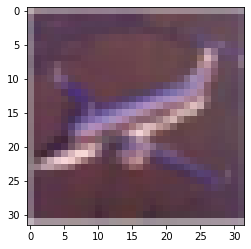

In [ ]:
plot_image(8155)

Models without Using Principal Component Analysis

Naive Bayes Classifier


In [ ]:
# Building and training model

model1 = GaussianNB()
model1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Prediction on test data

model1_pred = model1.predict(X_test)

In [ ]:
# Cross validation and accuacy score

print("Model accuracy on test set:", model1.score(X_test, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(model1, X_test, y_test, cv=5)) * 100)

Model accuracy on test set: 29.759999999999998
Cross-validation score on test data :  29.25


In [ ]:
# classification report 

print('calssification report of Naive Bayes:\n------------------------------------')
print(classification_report(y_test,model1_pred))

calssification report of Naive Bayes:
------------------------------------
              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1000
           1       0.41      0.17      0.24      1000
           2       0.19      0.08      0.12      1000
           3       0.25      0.08      0.12      1000
           4       0.24      0.42      0.30      1000
           5       0.31      0.26      0.29      1000
           6       0.25      0.47      0.33      1000
           7       0.42      0.13      0.20      1000
           8       0.39      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.28     10000
weighted avg       0.31      0.30      0.28     10000



Logistic Regression Classifier

In [ ]:
# Building and training model

model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# prediction on test data

model2_pred = model2.predict(X_test)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", model2.score(X_test, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(model2, X_test, y_test, cv=5)) * 100)

Model accuracy on test set: 40.239999999999995


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validation score on test data :  37.09


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# classification report

print("Classification report of Logistic Regression:\n-------------------------------------------")
print(classification_report(y_test, model2_pred))

Classification report of Logistic Regression:
-------------------------------------------
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.46      0.49      0.47      1000
           2       0.33      0.27      0.30      1000
           3       0.31      0.26      0.28      1000
           4       0.36      0.29      0.32      1000
           5       0.33      0.34      0.34      1000
           6       0.43      0.48      0.46      1000
           7       0.45      0.44      0.45      1000
           8       0.46      0.52      0.49      1000
           9       0.42      0.45      0.43      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



Using Random Forest Classifier

In [ ]:
# Building and training of model

model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# prediction on test data

model3_pred = model3.predict(X_test)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", model3.score(X_test, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(model3, X_test, y_test, cv=5)) * 100)

Model accuracy on test set: 46.81
Cross-validation score on test data :  41.459999999999994


In [ ]:
#Classification Report

print("Classification report of Random Forest :\n------------------------- ")
print(classification_report(y_test,model3_pred))

Classification report of Random Forest :
------------------------- 
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1000
           1       0.53      0.55      0.54      1000
           2       0.38      0.34      0.36      1000
           3       0.33      0.26      0.29      1000
           4       0.40      0.39      0.39      1000
           5       0.41      0.38      0.40      1000
           6       0.48      0.57      0.52      1000
           7       0.51      0.46      0.48      1000
           8       0.58      0.61      0.60      1000
           9       0.48      0.55      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



Using LDA classifier


In [ ]:
# Building and training model

model4 = LinearDiscriminantAnalysis()
model4.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Prediction on test data

model4_pred = model4.predict(X_test)

In [ ]:
# Cross validation and accuacy score

print("Model accuracy on test set:", model4.score(X_test, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(model4, X_test, y_test, cv=5)) * 100)

Model accuracy on test set: 37.13
Cross-validation score on test data :  24.349999999999998


In [ ]:
#Classification Report

print("Classification report of LDA :\n------------------------- ")
print(classification_report(y_test,model4_pred))

Classification report of LDA :
------------------------- 
              precision    recall  f1-score   support

           0       0.43      0.46      0.45      1000
           1       0.43      0.41      0.42      1000
           2       0.26      0.26      0.26      1000
           3       0.25      0.24      0.25      1000
           4       0.32      0.27      0.29      1000
           5       0.30      0.33      0.31      1000
           6       0.38      0.41      0.40      1000
           7       0.44      0.40      0.42      1000
           8       0.47      0.49      0.48      1000
           9       0.42      0.42      0.42      1000

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.37     10000
weighted avg       0.37      0.37      0.37     10000



Next we will train all these models after applying Principal Component Analysis and will use them to predict the classes. In order to use PCA, it is important to standardize the dataset.


Using Standard Scaler to Standardize data

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test  = scaler.transform(X_test)


Applying Pricipal Component Analysis (PCA)

In [ ]:
pca = PCA ()
pca.fit_transform(x_train)

array([[-2.20557381e+01,  1.22849042e+01,  8.96135095e+00, ...,
         5.39089318e-03,  5.58180986e-04, -2.60774472e-03],
       [ 4.01354905e+00, -5.04915634e+00,  2.53958923e+01, ...,
        -1.20631185e-03, -1.55110611e-03,  4.72296446e-03],
       [ 2.11123034e+01, -4.76871967e+01, -1.25735508e+01, ...,
        -1.95641086e-03, -1.98150370e-03,  1.93502441e-03],
       ...,
       [-5.79011324e+00, -4.49244141e+01, -4.24725698e+00, ...,
         5.51117587e-03, -5.06192238e-03,  1.70515002e-03],
       [ 4.23917856e+01, -1.65511813e+01,  2.22660304e+01, ...,
        -1.11556537e-03, -1.43552607e-03,  6.52224660e-03],
       [ 1.30753871e+01, -3.19221852e+00, -1.73174907e+01, ...,
        -2.31232834e-03,  2.07327476e-03,  1.24354774e-03]])

In [ ]:
pca.explained_variance_.shape

(3072,)

In [ ]:
#finding value of n_components for 95% variance

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.95):
    current_sum += pca.explained_variance_[k]
    k += 1

print("Number of components required to have 95% varaince = ",k)  

Number of components required to have 95% varaince =  221


In [ ]:
# Now Applying PCA with caluclated value of n_components

pca_final = PCA(n_components= k)

x_train_final = pca_final.fit_transform(x_train)
x_test_final  = pca_final.transform(x_test)

Prediction Using Naive Bayes Classifier



In [ ]:
# Building and training of model

nb = GaussianNB()
nb.fit(x_train_final,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting on test data

nb_pred = nb.predict(x_test_final)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", nb.score(x_test_final, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(nb, x_test_final, y_test, cv=5)) * 100)

Model accuracy on test set: 30.4
Cross-validation score on test data :  30.130000000000003


In [ ]:
# Classification report of Naive Bayes classifier

print("classification report of K Naive Bayes classifier:\n----------------------------------------")
print(classification_report(y_test,nb_pred))

classification report of K Naive Bayes classifier:
----------------------------------------
              precision    recall  f1-score   support

           0       0.32      0.14      0.20      1000
           1       0.39      0.46      0.42      1000
           2       0.24      0.13      0.17      1000
           3       0.25      0.16      0.19      1000
           4       0.21      0.62      0.32      1000
           5       0.36      0.19      0.25      1000
           6       0.46      0.26      0.34      1000
           7       0.40      0.30      0.34      1000
           8       0.37      0.33      0.35      1000
           9       0.29      0.45      0.35      1000

    accuracy                           0.30     10000
   macro avg       0.33      0.30      0.29     10000
weighted avg       0.33      0.30      0.29     10000



Prediction Using Logistic Regression


In [ ]:
# Building and training of model

lr = LogisticRegression()
lr.fit(x_train_final, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting on test data

lr_pred = lr.predict(x_test_final)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", lr.score(x_test_final, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(lr, x_test_final, y_test, cv=5)) * 100)

Model accuracy on test set: 40.6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validation score on test data :  36.980000000000004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Classification report of Logistic Regression model

print("classification report of Logistics Regression:\n----------------------------------------------")
print(classification_report(y_test,lr_pred))

classification report of Logistics Regression:
----------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      1000
           1       0.45      0.47      0.46      1000
           2       0.30      0.26      0.28      1000
           3       0.31      0.28      0.29      1000
           4       0.37      0.29      0.32      1000
           5       0.35      0.34      0.34      1000
           6       0.42      0.50      0.46      1000
           7       0.45      0.44      0.44      1000
           8       0.48      0.53      0.50      1000
           9       0.46      0.47      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.41      0.40     10000



Prediction Using Random Forest Classifier

In [ ]:
# Building and training of model 

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_final, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting on test data

rfc_pred = rfc.predict(x_test_final)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", rfc.score(x_test_final, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(rfc, x_test_final, y_test, cv=5)) * 100)

Model accuracy on test set: 43.7
Cross-validation score on test data :  37.13


In [ ]:
# Classification report of Random Forest Classifier  

print("classification report of Random Forest:\n-------------------------------------")
print(classification_report(y_test,rfc_pred))

classification report of Random Forest:
-------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1000
           1       0.49      0.55      0.52      1000
           2       0.33      0.29      0.31      1000
           3       0.28      0.24      0.26      1000
           4       0.41      0.39      0.40      1000
           5       0.36      0.35      0.35      1000
           6       0.45      0.51      0.48      1000
           7       0.50      0.41      0.45      1000
           8       0.53      0.62      0.57      1000
           9       0.45      0.48      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.43      0.44      0.43     10000
weighted avg       0.43      0.44      0.43     10000



Using LDA classifier


In [ ]:
# Building and training model

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_final, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Predicting on test data

lda_pred = lda.predict(x_test_final)

In [ ]:
# Cross validation  and accuacy score

print("Model accuracy on test set:", lda.score(x_test_final, y_test) * 100)
print("Cross-validation score on test data : ", np.mean(cross_val_score(lda, x_test_final, y_test, cv=5)) * 100)

Model accuracy on test set: 40.44
Cross-validation score on test data :  38.3


In [ ]:
# Classification report of Random Forest Classifier  

print("classification report of LDA:\n-------------------------------------")
print(classification_report(y_test,lda_pred))

classification report of LDA:
-------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.48      0.46      1000
           1       0.47      0.48      0.47      1000
           2       0.30      0.25      0.27      1000
           3       0.29      0.28      0.29      1000
           4       0.38      0.29      0.33      1000
           5       0.36      0.36      0.36      1000
           6       0.42      0.50      0.46      1000
           7       0.46      0.42      0.44      1000
           8       0.47      0.50      0.48      1000
           9       0.45      0.47      0.46      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [ ]:
def plot_test_image(n):
  img = X_test.iloc[n].to_numpy()
  label = y_test.iloc[n]
  name = label_names[int(label)]
  R = img[0:1024].reshape((32,32))
  G = img[1024:2048].reshape((32,32))
  B = img[2048:3072].reshape((32,32))
  print('Label :',name)
  img_array = np.dstack((R,G,B))
  plt.imshow(img_array)
  plt.show()

Label : b'horse'


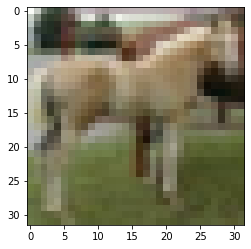

array([b'horse'], dtype='|S10')

In [ ]:
#test on a random image

a = 745
plot_test_image(a)
label_names[model2.predict([X_test.iloc[a]])]

Label : b'deer'


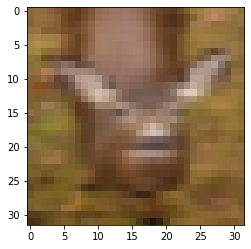

array([b'bird'], dtype='|S10')

In [ ]:
a = 3120
plot_test_image(a)
label_names[model2.predict([X_test.iloc[a]])]

Label : b'dog'


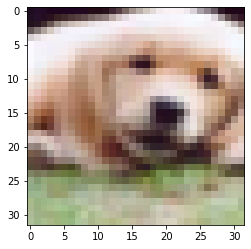

array([b'dog'], dtype='|S10')

In [ ]:
a = 9856
plot_test_image(a)
label_names[model2.predict([X_test.iloc[a]])]